# Japan Population

## Japan General Population

In [33]:
#load the file
import pandas as pd
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
df = pd.read_csv('Japan_General_Population')
df.head()


YEAR  AREA Code        AREA  Population
0  2018       1000    Hokkaido   5286000.0
1  2018       2000  Aomori-ken   1263000.0
2  2018       3000   Iwate-ken   1241000.0
3  2018       4000  Miyagi-ken   2316000.0
4  2018       5000   Akita-ken    981000.0

In [2]:
df['AREA']

0          Hokkaido
1        Aomori-ken
2         Iwate-ken
3        Miyagi-ken
4         Akita-ken
5      Yamagata-ken
6     Fukushima-ken
7       Ibaraki-ken
8       Tochigi-ken
9         Gumma-ken
10      Saitama-ken
11        Chiba-ken
12         Tokyo-to
13     Kanagawa-ken
14      Niigata-ken
15       Toyama-ken
16     Ishikawa-ken
17        Fukui-ken
18    Yamanashi-ken
19       Nagano-ken
20         Gifu-ken
21     Shizuoka-ken
22        Aichi-ken
23          Mie-ken
24        Shiga-ken
25         Kyoto-fu
26         Osaka-fu
27        Hyogo-ken
28         Nara-ken
29     Wakayama-ken
30      Tottori-ken
31      Shimane-ken
32      Okayama-ken
33    Hiroshima-ken
34    Yamaguchi-ken
35    Tokushima-ken
36       Kagawa-ken
37        Ehime-ken
38        Kochi-ken
39      Fukuoka-ken
40         Saga-ken
41     Nagasaki-ken
42     Kumamoto-ken
43         Oita-ken
44     Miyazaki-ken
45    Kagoshima-ken
46      Okinawa-ken
Name: AREA, dtype: object

In [3]:
# eliminate subfix -ken, -fu, -to to allow doing match with the geojson file
df['AREA'] = df['AREA'].str.replace('-ken',' Ken')
df['AREA'] = df['AREA'].str.replace('-fu',' Fu')
df['AREA'] = df['AREA'].str.replace('-to',' To')

In [4]:
# to verify that we have the 47 perfectures
df.shape

(47, 4)

In [5]:
# read json file
import requests
repo_url = 'https://raw.githubusercontent.com/dataofjapan/land/master/japan.geojson'
japan_region_geo = requests.get(repo_url).json()


In [6]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

Solving environment: done

# All requested packages already installed.



In [7]:
address = 'Tokyo, Japan'

geolocator = Nominatim(user_agent="Japan_City_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Japan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Japan are 35.6828387, 139.7594549.


In [8]:
!pip install folium 
import folium
from branca.element import Figure

In [9]:
communities_map = folium.Map(location=[latitude,longitude],zoom_start=5)
communities_map.choropleth(
    geo_data=japan_region_geo,
    data=df,
    columns=['AREA','Population'],
    key_on='properties.nam',
    fill_color='YlGnBu', 
    fill_opacity=1, 
    line_opacity=1,
    legend_name='Japan Population',
    smooth_factor=0)
communities_map

## Tokyo wards 

In [34]:
df = pd.read_csv('Japan_WardTokyo.csv')
df.head()


No.      Name Kanji  Poblacion  Density(/km2)  Area(km2)  \
0    1   Chiyoda  千代田区    59441.0         5100.0      11.66   
1    2      Chūō   中央区   147620.0        14460.0      10.21   
2    3    Minato    港区   248071.0        12180.0      20.37   
3    4  Shinjuku   新宿区   339211.0        18620.0      18.22   
4    5    Bunkyō   文京区   223389.0        19790.0      11.29   

                                      MajorDistricts  
0  Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...  
1  Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb...  
2  Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong...  
3  Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich...  
4                              Hongō, Yayoi, Hakusan

In [35]:
# verify the number of wards
df.shape

(23, 7)

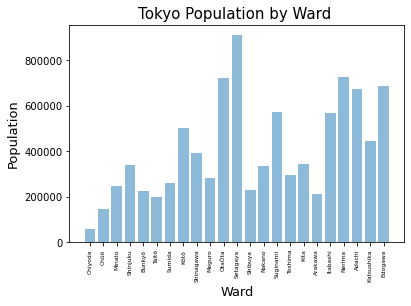

In [66]:
%matplotlib inline
# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

#mpl.style.use('ggplot') # optional: for ggplot-like style
plt.bar(df['Name'], df['Poblacion'], align='center', alpha=0.5)
#df.hist(column="Population")
plt.title('Tokyo Population by Ward ', fontsize = 15)
plt.xlabel('Ward', fontsize = 13)
plt.ylabel('Population', fontsize = 13)
plt.xticks(rotation = 'vertical', fontsize = 6)
#plt.tight_layout()
plt.show()

In [76]:
df.sort_values(by=['Poblacion'],ascending=False).head(3)

No.      Name Kanji  Poblacion  Density(/km2)  Area(km2)  \
11   12  Setagaya  世田谷区   910868.0        15690.0      58.05   
19   20    Nerima   練馬区   726748.0        15120.0      48.08   
10   11    OtaŌta   大田区   722608.0        11910.0      60.66   

                                 MajorDistricts  
11  Shimokitazawa, Kinuta, Karasuyama, Tamagawa  
19                  Nerima, Ōizumi, Hikarigaoka  
10          Ōmori, Kamata, Haneda, Den-en-chōfu

* Setagaya Ward has the major population (almost triple Mexico City)

In [114]:
newdf = df[df['Density(/km2)']<=5936.8]

In [115]:
newdf.head(5)

No.     Name Kanji  Poblacion  Density(/km2)  Area(km2)  \
0    1  Chiyoda  千代田区    59441.0         5100.0      11.66   

                                      MajorDistricts  
0  Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...

* Chiyoda has a similar density/km2 as Mexico City 

In [117]:
area_dict = dict(zip(newdf.Name, newdf.MajorDistricts))

In [126]:
area_dict

{'Chiyoda': 'Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi, Akihabara, Yūrakuchō, Iidabashi, Kanda'}

In [167]:
df1  = df.MajorDistricts.str.split(', ')
df1 = df1.explode('MajorDistricts').reset_index(drop=True)


In [168]:
df1['MajorDistricts'] = ['MajorDistricts']

In [169]:
df1['Ward'] = ['Ward']

In [175]:
df1.head()

0       Nagatachō
1    Kasumigaseki
2        Ōtemachi
3      Marunouchi
4       Akihabara
Name: MajorDistricts, dtype: object

In [177]:
df1[0]

'Nagatachō'